# Support Vector Machine - SVM

## CONTENIDO

- Problema
- Fundamentación
- Optimización
- Hiperparámetros
    - C
    - Gamma
- Problema de clases linealmente separables
- Problema de clases linealmentes no separables
- Truco Kernel
- Ejercico: Clasificación de papa molinera 

--------------

Es un modelo muy versátil del Aprendizaje de Máquina (Machine Learning)

- Clasificación lineales 
- Clasificación no lineales
- Regresión
- Detección de outliers


### Problema

Si utilizamos perceptrones tendremos muchos resultados:

<p align="center">
  <img width="300" src="./img/grafica1.png" alt="Material Bread logo">
  <img width="300" src="./img/grafica2.png" alt="Material Bread logo">
    
Vladimir Vapnik propone en generar el mejor de esos planos para separar esas características.
  <img width="300" src="./img/grafica3.png" alt="Material Bread logo">

</p>

### Fundamentación

Sea $x$ $\epsilon$  $\mathbb{R}^2$ el espacio de características y $w$ $\epsilon$ $\mathbb{R}^2$ los parámetros del sistema, es posible determinar un hiperplano de decisión representado por $$w.x + b = 0$$

<p align="center">
  <img width="300" src="./img/grafica4.png" alt="Material Bread logo">
</p>

La ecuación del plano principal es: $$w_1 x_1 + w_2 x_2 + b = 0$$

Donde: $$w.x + b > 0 $$ & $$w.x + b < 0$$

Ejemplo: $$3.2x_1 - 0.8x_2 - 10.88 = 0$$

Evaluando un punto cualesquiera, por ejemplo $$(x_1, x_2) = (2, 0.5) = -4.88 < 0$$ $$(x_1, x_2) = (5, 0.5) = 4.72 > 0$$

Frontera de decisión con margen:  $$w.x_+ + b \geq 1$$  $$w.x_- + b \leq -1$$

<p align="center">
  <img width="300" src="./img/grafica5.png" alt="Material Bread logo">
</p>

Expresión equivalente: $y_i(w.x + b) \geq 1
\left\{ \begin{array}{lcc}
             y_i = 1 & x_+ \\
             y_i = -1 & x_-
             \end{array}
\right.$

Para los vectores de soporte $$y_i(w.x +b) - 1 = 0$$

<p align="center">
  <img width="500" src="./img/grafica6.png" alt="Material Bread logo">
</p>

Determinando la longitud del margen
$$d_- = \frac{x_-.w}{\parallel w \parallel}$$

$$d_+ = \frac{x_+.w}{\parallel w \parallel}$$

Factorizando 
$$d = d_+ - d_- = \frac{1}{\parallel w \parallel} (x_+.w - x_-.w)$$

Sabemos que para los vectores de soporte $$y_i(w.x + b) -1 = 0 $$

$$d = \frac{1}{\parallel w \parallel} (1 -b + 1 + b) $$

$$d = \frac{2}{\parallel w \parallel}$$

El objetivo de SVM es máximizar el margen, esto es igual a : $$argmax_w = \frac{2}{w^T w}$$

Este es equivalente a su inverso (Minimización):
$$argmin_w = \frac{1}{2} w^T w$$

Sin embargo, las restricciones es que los vectores de soporte deben estar sobre los planos $$ y_i(w.x_\pm + b) -1 = 0$$

### Multiplicadores de lagrange - Optimización

Función objetivo $$f(w) = \frac{1}{2} w^T w $$

Restricciones de igualdad (una por cada vector de soporte) $$g(w, b) = y_i(w.x_\pm + b) -1 = 0$$

Convierte en una Miniminización sin restricciones $$L(w, b, \alpha_i) = \frac{1}{2} w^T w - \sum_{i = 1}^{l} \alpha_i[y_i(w.x_i + b) -1]$$

Donde $\alpha_i$ vienen hacer los coeficientes de Lagrange

Para obtener el mínimo de la función L, debemos derivar con respecto a $w$ y $b$

$$\frac{\partial L}{\partial w} = 0 | w = \sum_{i=1}^{l}\alpha_iy_ix_i $$

$$\frac{\partial L}{\partial b} = 0 | b = \sum_{i=1}^{l}\alpha_iy_i$$

Reemplazando en la función de lagrange:
$$L(\alpha_i) = \sum_i \alpha_i - \frac{1}{2}\sum_i \sum_j \alpha_i\alpha_j y_iy_j(x_i.xj)$$

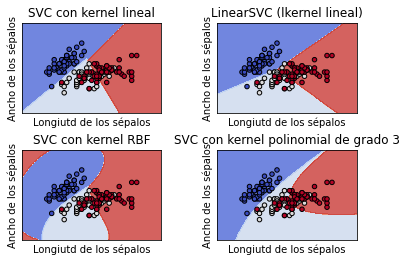

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# importamos el datasets iris

iris = datasets.load_iris()
# Escogemos las 2 primeras características para trabajar en 2 dimensiones.
X = iris.data[:, :2]
y = iris.target

# Creamos una instancia de SVM y entrenamos. 
# No escalamos los datos porque queremos trazar los vectores de soporte
# SVM - parámetro de regularización
C = 1.0  
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

titles = ('SVC con kernel lineal',
          'LinearSVC (lkernel lineal)',
          'SVC con kernel RBF',
          'SVC con kernel polinomial de grado 3')

# Configuramos una tabla de 2x2
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Longiutd de los sépalos')
    ax.set_ylabel('Ancho de los sépalos')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### C
- Reducimos el valor de C bajos tienden a ser más generalizados.

### gamma
- Aumentar el valor de gamma, hará que se estreche la curva en forma de la función seno - límite de frontera es irregular
- Reducir el valor de gamma, se volverá en forma de función de seno más amplia (amplitud) - límite de frontera es más suave 

<p align="center">
  <img width="500" src="./img/grafico9.png" alt="Material Bread logo">
</p>

### Problema de clases linealmente separables


/home/nelsuni/.conda/envs/Keras/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


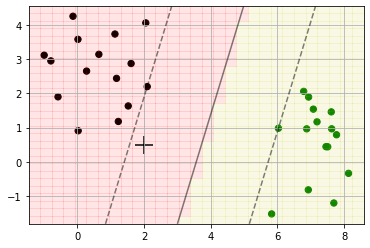

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib

# Generamos 30 muestras con dos características, asociadas a dos clases
X, y = make_blobs(n_samples=30, n_features=2, centers=2, random_state=21, center_box=(0, 10.0))

# Creamos el modelo SVM para clasificación con kernel lineal y entrenamos el modelo
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)

# Graficamos los datos en el espacio de caracteríticas
cmap   = matplotlib.colors.ListedColormap( [ 'k', 'g' ] )
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,cmap=cmap)

# Creamos un mesh para evaluar la función de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Graficamos el hiperplano y el margen
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Graficamos los vectores soporte
Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)

cmap   = matplotlib.colors.ListedColormap( [ 'r', 'y' ] )
plt.pcolormesh(XX, YY, Z_pred, cmap = cmap, alpha=0.1)

new_x = [[2,0.5]]
new_z = clf.predict(new_x)

if new_z[0]==0: color='k'
else: color='g'
    
plt.scatter(new_x[0][0], new_x[0][1] , marker = '+', color=color, s=300)
plt.grid()
plt.show()

### Problema de clases linealmentes no separables

/home/nelsuni/.conda/envs/Keras/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


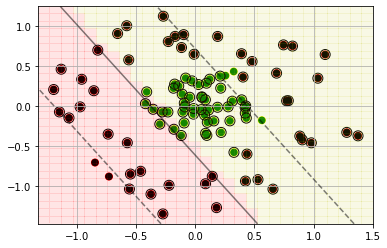

In [36]:
# Veamos el uso de kernels para el problema de clases linealmente no separables
from sklearn.datasets import make_circles

# generamos 100 muestras con dos características, asociadas a dos clases
X, y = make_circles(100, factor=.2, noise=.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Creamos el modelo SVM para clasificación con kernel lineal/rbf y entrenamos el modelo
clf = svm.SVC(kernel='linear', C=100).fit(X, y)

# Graficamos los datos en el espacio de caracteríticas
cmap   = matplotlib.colors.ListedColormap( [ 'k', 'g' ] )
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,cmap=cmap)

#  Creamos un mesh para evaluar la función de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Graficamos el hiperplano y el margen
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Graficamos los vectores soporte
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)

cmap   = matplotlib.colors.ListedColormap( [ 'r', 'y' ] )
plt.pcolormesh(XX, YY, Z_pred,cmap = cmap,alpha=0.1)

plt.grid()
plt.show()

### Truco Kernel

Kernel comunes:
- Lineal $K(a, b) = a^T.b $
- Polinomial $K(a, b) = ( \gamma a^T.b + r )^d$
- RBF gausiano $K(a, b) = exp( -\gamma \parallel a - b \parallel^2 )$
- Sigmoide $K(a, b) = tanh( \gamma a^T.b + r )$

$$L(\alpha_i) = \sum_i \alpha_i - \frac{1}{2}\sum_i \sum_j \alpha_i\alpha_j y_iy_jK(x_i.xj)$$

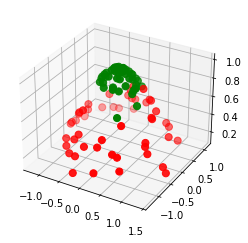

In [37]:
# Veamos el efecto del truco kernel (aumentando la dimensionalidad del espacio de entradas)
from mpl_toolkits import mplot3d

# Aplicamos una operación de kernel gaussiano para separar las clases
# Gamma controla el efecto del kernel, si es muy pequeño el modelo se parece al lineal
gamma = 1
Xr = np.exp(-gamma*(X ** 2).sum(1))

# Graficamos el espacio de características mapeado por el kernel
ax = plt.subplot(projection='3d')
cmap   = matplotlib.colors.ListedColormap( [ 'r', 'g' ] )
ax.scatter3D(X[:, 0], X[:, 1], Xr, c=y, s=50, cmap=cmap)

# Ejemplo de las papa molineras infectadas